# NEWS CATEGORY CLASSIFICATION

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn import model_selection, svm
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [2]:
testdata=pd.read_csv('te/te-test.csv')
traindata=pd.read_csv('te/te-train.csv')
validdata=pd.read_csv('te/te-valid.csv')
traindata.columns=['col1','col2']
testdata.columns=['col1','col2']
validdata.columns=['col1','col2']
news=list(traindata['col2'])
cats=list(set(traindata['col1']))
validnews=list(validdata['col2'])
validcats=list(set(validdata['col1']))
print(len(news))
print(len(cats))
traindata['news']=traindata['col2']
traindata['category']=traindata['col1']
validdata['news']=validdata['col2']
validdata['category']=validdata['col1']

19199
3


In [3]:
train_x,train_y= traindata['news'], traindata['category']
valid_x,valid_y=validdata['news'], validdata['category']
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [34]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

# Naive Bayes Classifier

## Word Level 

0.9641517298874531
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       800
           1       0.94      0.99      0.96       818
           2       0.98      0.93      0.95       781

    accuracy                           0.96      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.96      0.96      0.96      2399



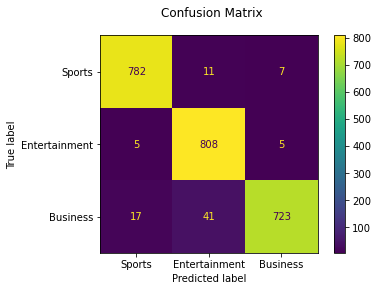

predicting data 
sports
[2]


array([2])

In [35]:
# Naive Bayes on Word Level TF IDF Vectors
clf =naive_bayes.MultinomialNB().fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf)

## Ngram Level 

0.9799916631929971
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       800
           1       0.97      0.99      0.98       818
           2       0.99      0.96      0.98       781

    accuracy                           0.98      2399
   macro avg       0.98      0.98      0.98      2399
weighted avg       0.98      0.98      0.98      2399



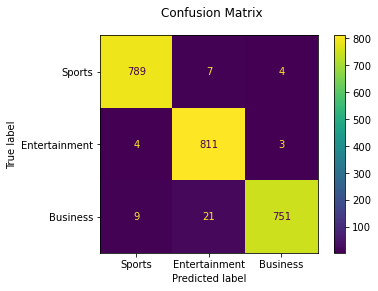

predicting data 
sports
[2]


array([2])

In [36]:
# Naive Bayes on Ngram Level TF IDF Vectors
clf =naive_bayes.MultinomialNB().fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))

print(metrics.classification_report(valid_y, y_pred))


fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()


print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram)

## Characters Level 

0.9695706544393498
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       800
           1       0.95      0.99      0.97       818
           2       0.98      0.94      0.96       781

    accuracy                           0.97      2399
   macro avg       0.97      0.97      0.97      2399
weighted avg       0.97      0.97      0.97      2399



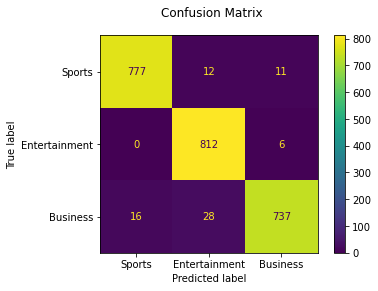

predicting data 
sports
[2]


array([2])

In [37]:
# Naive Bayes on Character Level TF IDF Vectors
clf =naive_bayes.MultinomialNB().fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram_chars)

# SVM Classifier

In [38]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

## Word level 

0.9837432263443101
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       800
           1       0.97      0.99      0.98       818
           2       0.99      0.96      0.98       781

    accuracy                           0.98      2399
   macro avg       0.98      0.98      0.98      2399
weighted avg       0.98      0.98      0.98      2399



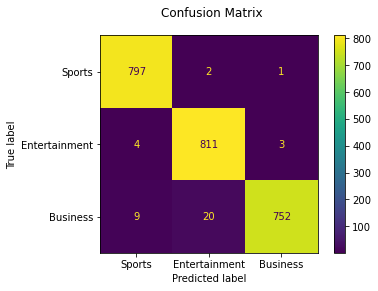

predicting data 
sports
[2]


array([2])

In [39]:
clf = svm.SVC().fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf)

## Ngram Level

0.9945810754481034
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.99      1.00      0.99       818
           2       1.00      0.99      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



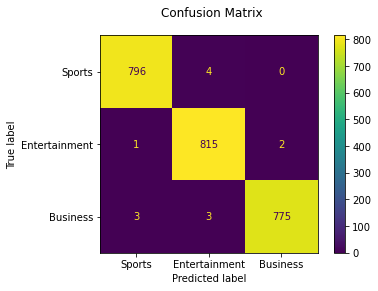

predicting data 
sports
[2]


array([2])

In [40]:
clf = svm.SVC().fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][20])
print(encoder.transform([validdata['col1'][20]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][20]])
clf.predict(xvalid_tfidf_ngram)

## Characters level

0.995831596498541
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       818
           2       1.00      0.99      1.00       781

    accuracy                           1.00      2399
   macro avg       1.00      1.00      1.00      2399
weighted avg       1.00      1.00      1.00      2399



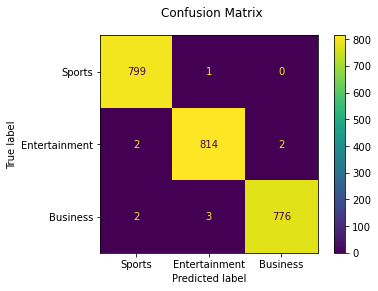

predicting data 
sports
[2]


array([2])

In [41]:
clf = svm.SVC().fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram_chars)

# MLP Classifier

## Word Level 

0.9816590245935807
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.98      0.98      0.98       818
           2       0.98      0.98      0.98       781

    accuracy                           0.98      2399
   macro avg       0.98      0.98      0.98      2399
weighted avg       0.98      0.98      0.98      2399



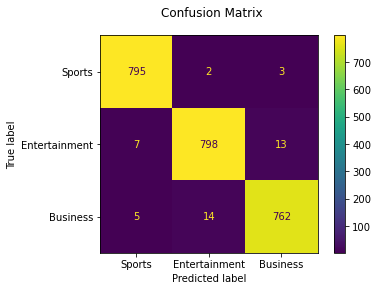

sports
[2]


array([2])

In [42]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf)

## Ngram Level 

0.9941642350979575
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.99      1.00      0.99       818
           2       0.99      0.99      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



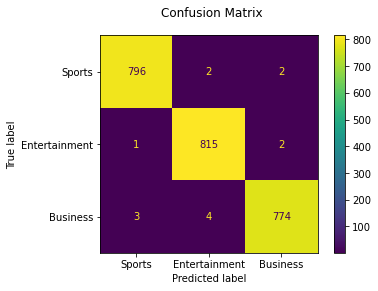

predicting data 
entertainment
[1]


array([1])

In [43]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][30])
print(encoder.transform([validdata['col1'][30]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][30]])
clf.predict(xvalid_tfidf_ngram)

## Character Level 

0.9933305543976657
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       800
           1       0.99      1.00      0.99       818
           2       1.00      0.99      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



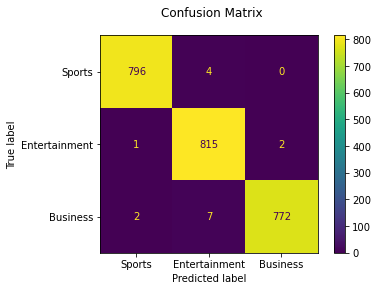

predicting data 
entertainment
[1]


array([1])

In [44]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][30])
print(encoder.transform([validdata['col1'][30]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col1'][30]])
clf.predict(xvalid_tfidf_ngram_chars)

# RandomForest Classifier

In [47]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

## Word Level 

0.9670696123384743
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       800
           1       0.95      0.99      0.97       818
           2       0.99      0.93      0.96       781

    accuracy                           0.97      2399
   macro avg       0.97      0.97      0.97      2399
weighted avg       0.97      0.97      0.97      2399



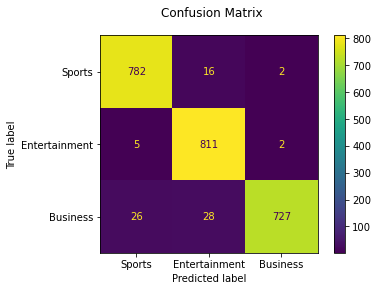

predicting data 
sports
[2]


array([2])

In [48]:
# RF on Word Level TF IDF Vectors
clf = RandomForestClassifier().fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf)

## Ngram Level

0.9879116298457691
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.98      1.00      0.99       818
           2       1.00      0.97      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



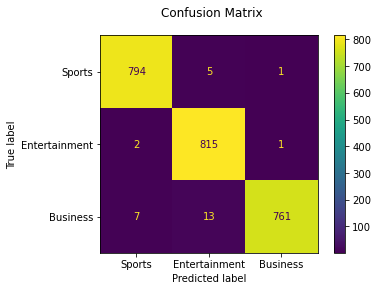

predicting data 
sports
[2]


array([2])

In [49]:
# RF on Ngram Level TF IDF Vectors
clf = RandomForestClassifier().fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram)

## Characters level

0.9870779491454773
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.98      1.00      0.99       818
           2       0.99      0.97      0.98       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



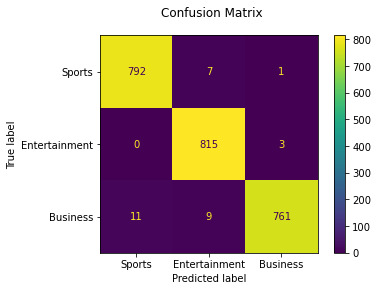

predicting data 
sports
[2]


array([2])

In [50]:
# RF on Character Level TF IDF Vectors
clf = RandomForestClassifier().fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram_chars)

# Decision Tree Classifier

In [51]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

## Word level 

0.905794080867028
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       800
           1       0.90      0.91      0.91       818
           2       0.90      0.90      0.90       781

    accuracy                           0.91      2399
   macro avg       0.91      0.91      0.91      2399
weighted avg       0.91      0.91      0.91      2399



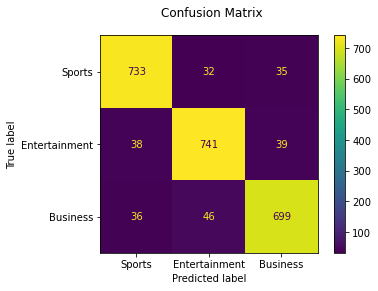

predicting data 
sports
[2]


array([2])

In [52]:
clf = DecisionTreeClassifier().fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf)

## Ngram Level

0.9395581492288454
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       800
           1       0.94      0.94      0.94       818
           2       0.94      0.94      0.94       781

    accuracy                           0.94      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.94      0.94      0.94      2399



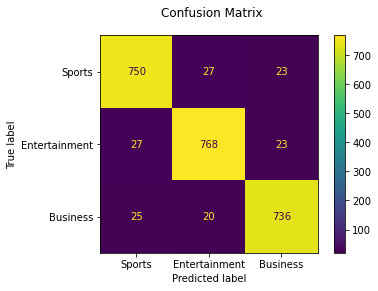

predicting data 
business
[0]


array([0])

In [53]:
clf = DecisionTreeClassifier().fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][39])
print(encoder.transform([validdata['col1'][39]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][39]])
clf.predict(xvalid_tfidf_ngram)

## Characters level

0.944977073780742
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       800
           1       0.95      0.94      0.95       818
           2       0.94      0.95      0.94       781

    accuracy                           0.94      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.94      0.94      0.94      2399



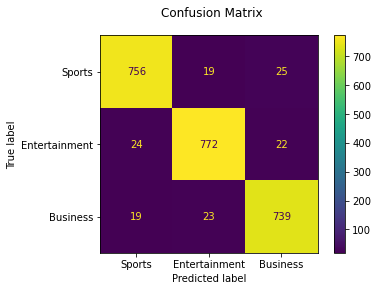

predicting data 
sports
[2]


array([2])

In [54]:
clf = DecisionTreeClassifier().fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][40])
print(encoder.transform([validdata['col1'][40]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col2'][40]])
clf.predict(xvalid_tfidf_ngram_chars)

# Logistic Regression 

In [56]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(traindata['news'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(traindata['news'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(traindata['news'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

## Word level 

0.9729053772405168
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       800
           1       0.96      0.98      0.97       818
           2       0.99      0.95      0.97       781

    accuracy                           0.97      2399
   macro avg       0.97      0.97      0.97      2399
weighted avg       0.97      0.97      0.97      2399



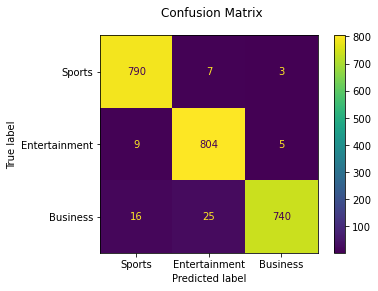

predicting data 
entertainment
[1]


array([1])

In [57]:
# LR on Word Level TF IDF Vectors
clf = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)
y_pred=clf.predict(xvalid_tfidf)
print(clf.score(xvalid_tfidf, valid_y))

print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][30])
print(encoder.transform([validdata['col1'][30]]))
xvalid_tfidf= tfidf_vect.transform([validdata['col2'][30]])
clf.predict(xvalid_tfidf)

## Ngram level 

0.9916631929970822
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       800
           1       0.99      1.00      0.99       818
           2       0.99      0.99      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



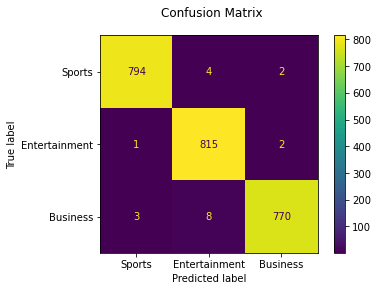

predicting data 
entertainment
[1]


array([1])

In [58]:
# LR on Ngram Level TF IDF Vectors
clf = linear_model.LogisticRegression().fit(xtrain_tfidf_ngram, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram)
print(clf.score(xvalid_tfidf_ngram, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][30])
print(encoder.transform([validdata['col1'][30]]))
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform([validdata['col2'][30]])
clf.predict(xvalid_tfidf_ngram)

## Characters Level 

0.9912463526469362
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       800
           1       0.98      1.00      0.99       818
           2       1.00      0.98      0.99       781

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



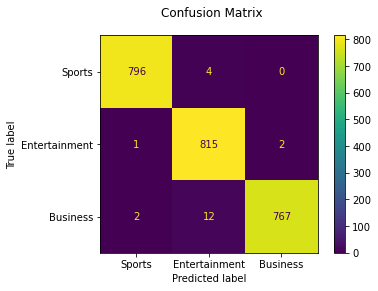

predicting data 
entertainment
[1]


array([1])

In [59]:
# LR on Character Level TF IDF Vectors
clf = linear_model.LogisticRegression().fit(xtrain_tfidf_ngram_chars, train_y)
y_pred=clf.predict(xvalid_tfidf_ngram_chars)
print(clf.score(xvalid_tfidf_ngram_chars, valid_y))


print(metrics.classification_report(valid_y, y_pred))

fig=plot_confusion_matrix(clf, xvalid_tfidf_ngram_chars, valid_y,display_labels=["Sports","Entertainment","Business"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

print("predicting data ")
print(validdata['col1'][30])
print(encoder.transform([validdata['col1'][30]]))
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform([validdata['col1'][30]])
clf.predict(xvalid_tfidf_ngram_chars)

# Neural Networks  

In [4]:
traindata = pd.read_csv('te/te-train.csv',encoding="utf-8")
validdata=pd.read_csv('te/te-valid.csv')
validdata.columns=['col1','col2']
trainDF = pd.DataFrame()
traindata.columns=['col1','col2']
trainDF['text'] = traindata['col2']
trainDF['categories'] = traindata['col1']
validDF=pd.DataFrame()

validDF['text'] = validdata['col2']
validDF['categories'] = validdata['col1']


    
# print(texts)
# print(labels)


trainDF

,text,categories
0,కారు నుంచి రోడ్డుపై చెత్తపడేసిన వ్యక్తికి.. ఆ ...,sports
1,ధోని కథ ముగిసిందా?\nSun 27 Oct 01:52:52.003569...,sports
2,వార్తలు\n12 నుంచి విజయవాడలో విమానయాన సదస్సు......,business
3,"May 04,2015\nఅంచనాలను చేరని ప్రత్యక్ష పన్ను వస...",business
4,వెలికితీతలో ప్రైవేటురంగానికి ప్రాధాన్యం \nకొత...,business
...,...,...
19194,Hyd Internet 116 Views Sachin Tendulkar\nSachi...,sports
19195,సూర్యాపేట జిల్లాలో హైవేపై రెండు కార్లు దగ్ధం W...,entertainment
19196,"May 12,2016\nఅందుకే శాఖలు తెరవడం లేదు!\nలండన్‌...",business
19197,రాజశేఖర్ గరుడవేగ హిట్ మూవీ కాదా.. ఈ లెక్కలేంటి...,entertainment


In [8]:
train_x,train_y= trainDF['text'], trainDF['categories']
valid_x,valid_y=validDF['text'], validDF['categories']

In [9]:
embeddings_index = {}

import numpy as np

from keras.preprocessing import text, sequence

for i, line in enumerate(open('cc.te.300.vec\cc.te.300.vec',encoding="utf-8")):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
    

In [10]:
encoder = preprocessing.LabelEncoder()
trainLabels = encoder.fit_transform(train_y)
trainLabels = [np_utils.to_categorical(i, num_classes=3) for i in trainLabels]
trainLabels = np.asarray(trainLabels)
print(trainLabels.shape)
validLabels = encoder.fit_transform(valid_y)
validLabels = [np_utils.to_categorical(i, num_classes=3) for i in validLabels]
validLabels = np.asarray(validLabels)
print(validLabels.shape)

(19199, 3)
(2399, 3)


In [11]:
count_vect = CountVectorizer()
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
#print(xtrain_count)
print(xtrain_count.shape)

(19199, 27194)


In [12]:
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

In [13]:
input_size = 150
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x),maxlen=input_size)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x),maxlen=input_size)
print(train_seq_x)
print(train_seq_x.shape)
print(valid_seq_x.shape)

[[  1064   1205    612 ...     84    464     39]
 [     0      0      0 ...   2381    518      1]
 [   677   2710  83110 ... 127093   1178    377]
 ...
 [     0      0      0 ...    159    161    162]
 [    48   3294    482 ...    821     62     10]
 [ 24638    345    713 ...    703 100031     22]]
(19199, 150)
(2399, 150)


# Convolutional Neural Network

In [14]:
embedding_matrix = np.zeros((len(word_index)+1, 300))

for word,i in word_index.items():
        embedding_vector = embeddings_index.get(word)    # checking that particular indexed word in telugu embedding .vec file
        if embedding_vector is not None:                 # if it is found in that .vec file  
            embedding_matrix[i] = embedding_vector       # store that vector of that word in .vec file saved to embedding matrix
               
print(embedding_matrix)  
print(embedding_matrix.shape)

[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.0141  0.0535 -0.0414 ...  0.038  -0.0589 -0.0018]
 [-0.0043 -0.02    0.0177 ...  0.0183  0.0265 -0.0276]
 ...
 [-0.0115  0.0076  0.0139 ...  0.0131  0.0018 -0.0031]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]
(292445, 300)


In [50]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((input_size, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.25)(embedding_layer)

    #Add the convolutional layer
    conv_layer = layers.Convolution1D(256, 3, activation="tanh")(embedding_layer)
    
    #Add the pooling layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)
    
    # Add the output Layers
    output_layer1 = layers.Dense(128, activation="tanh")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(3, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])
    #model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    
    print(model.summary())
    return model

In [56]:
classifier = create_cnn()
is_neural_net = True
classifier.fit(train_seq_x, trainLabels, epochs=10)
    
predictions = classifier.predict(valid_seq_x)
predictions1 = predictions.argmax(axis=-1)
validLabels1 = validLabels.argmax(axis=-1)

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 150, 300)          87733500  
_________________________________________________________________
spatial_dropout1d_16 (Spatia (None, 150, 300)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 148, 256)          230656    
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0  

In [57]:
acc = metrics.accuracy_score(predictions1, validLabels) 
print(acc)
print(metrics.classification_report(predictions1, validLabels))

0.9929137140475198
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       796
           1       0.99      1.00      0.99       815
           2       0.99      0.99      0.99       788

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



# Bidirectional RNN

In [58]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((150, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(150, activation="tanh")(lstm_layer)
    #output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(3, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])
    print(model.summary())
    return model

In [59]:
classifier = create_bidirectional_rnn()
is_neural_net=True  
classifier.fit(train_seq_x, trainLabels, epochs=10)
    
    # predict the labels on validation dataset
predictions = classifier.predict(valid_seq_x)
predictions1 = predictions.argmax(axis=-1)
validLabels1 = validLabels.argmax(axis=-1)


Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 150, 300)          87733500  
_________________________________________________________________
spatial_dropout1d_17 (Spatia (None, 150, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               241200    
_________________________________________________________________
dense_34 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 453       
Total params: 88,005,303
Trainable params: 271,803
Non-trainable params: 87,733,500
________________________________________

In [60]:
acc = metrics.accuracy_score(predictions1, validLabels) 
print(acc)
print(metrics.classification_report(predictions1, validLabels))

0.9933305543976657
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       799
           1       0.99      0.99      0.99       816
           2       0.99      0.99      0.99       784

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



# Recurrent Neural Network – LSTM

In [61]:
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((input_size, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(1500, activation="tanh")(lstm_layer)
    #output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(3, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])
    print(model.summary())
    return model
 

In [62]:
classifier = create_rnn_lstm()
is_neural_net=True  
classifier.fit(train_seq_x, trainLabels, epochs=5)
predictions = classifier.predict(valid_seq_x)
predictions1 = predictions.argmax(axis=-1)
validLabels1 = validLabels.argmax(axis=-1)

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 150, 300)          87733500  
_________________________________________________________________
spatial_dropout1d_18 (Spatia (None, 150, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense_36 (Dense)             (None, 1500)              151500    
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 4503      
Total params: 88,049,903
Trainable params: 316,403
Non-trainable params: 87,733,500
________________________________________

In [63]:
acc = metrics.accuracy_score(predictions1, validLabels) 
print(acc)
print(metrics.classification_report(predictions1, validLabels))

0.9895789912463526
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       799
           1       0.99      0.99      0.99       823
           2       0.98      0.99      0.99       777

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399

